In [1]:
import lsst.afw.image as afwImage
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

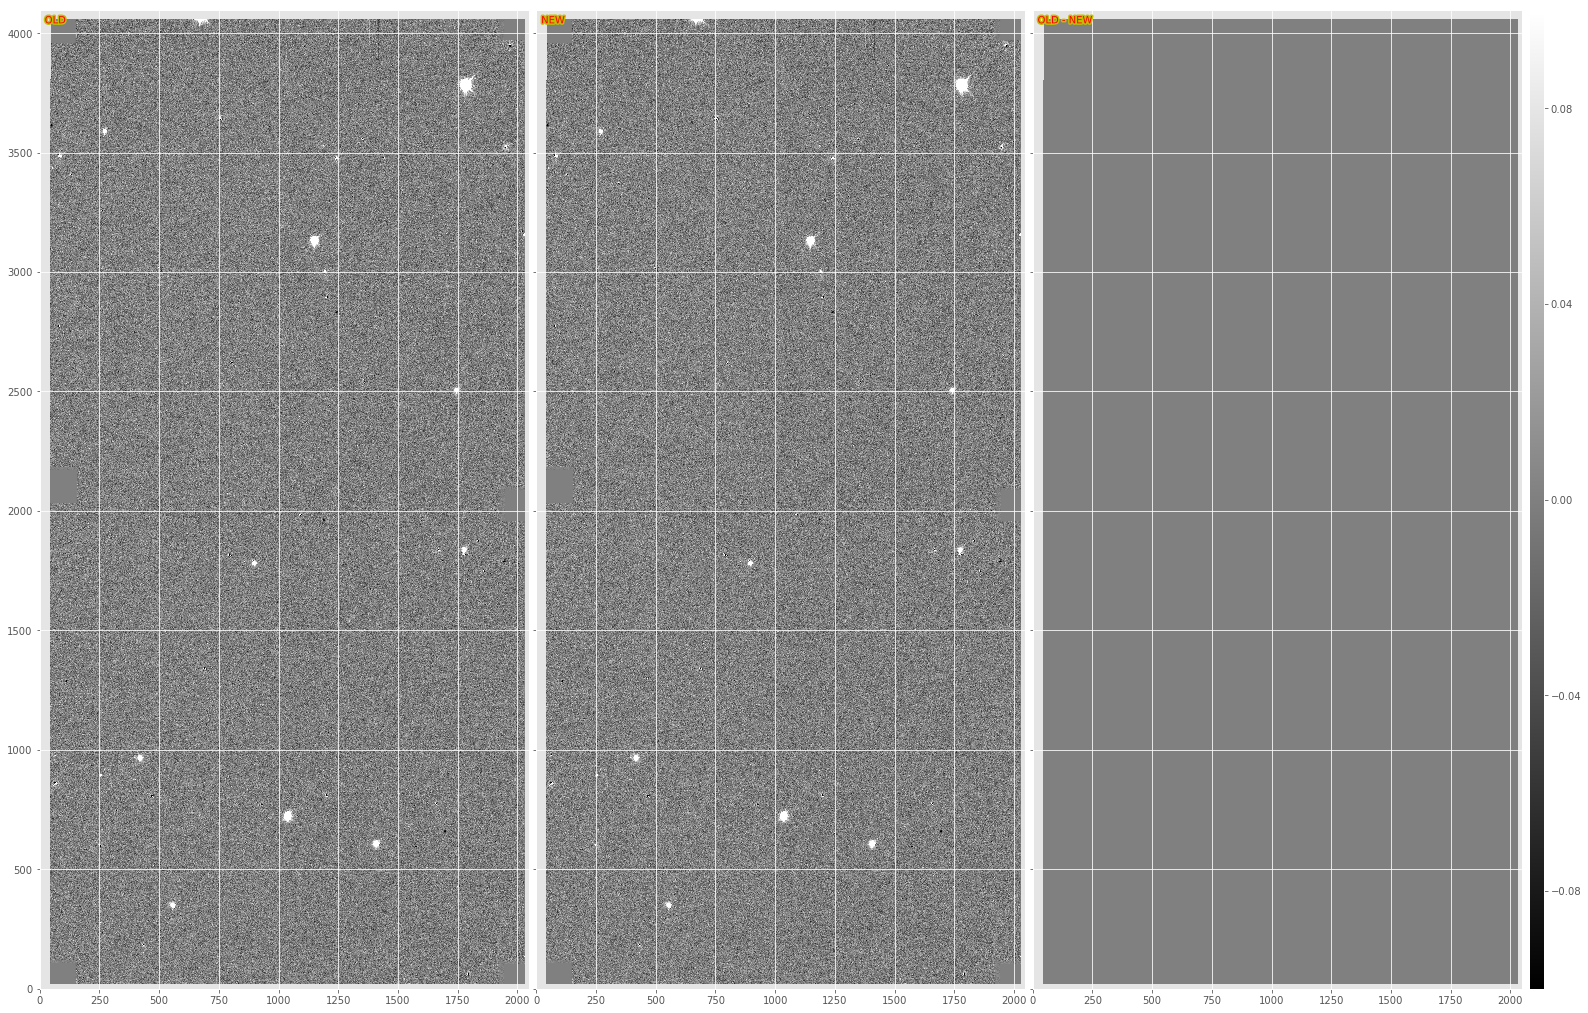

In [2]:
al_OLD = afwImage.ExposureF('decamDirTestOLD/deepDiff/v289820/diffexp-11.fits')
al_NEW = afwImage.ExposureF('decamDirTestNEW/deepDiff/v289820/diffexp-11.fits')
tmp = al_OLD.clone()
tmpImg = tmp.getMaskedImage()
tmpImg -= al_NEW.getMaskedImage()

import diffimTests as dit
dit.plotImageGrid((al_OLD, al_NEW, tmp), imScale=18,
                 titles=['OLD', 'NEW', 'OLD - NEW'])

In [3]:
template = afwImage.ExposureF('calexpDir_b1631/0288976/calexp/calexp-0288976_11.fits')
science = afwImage.ExposureF('calexpDir_b1631/0289820/calexp/calexp-0289820_11.fits')
matched_template = afwImage.ExposureF('decamDirTest_AL/deepDiff/v289820/matchexp-11.fits')
al_img = afwImage.ExposureF('decamDirTest_AL/deepDiff/v289820/diffexp-11.fits')

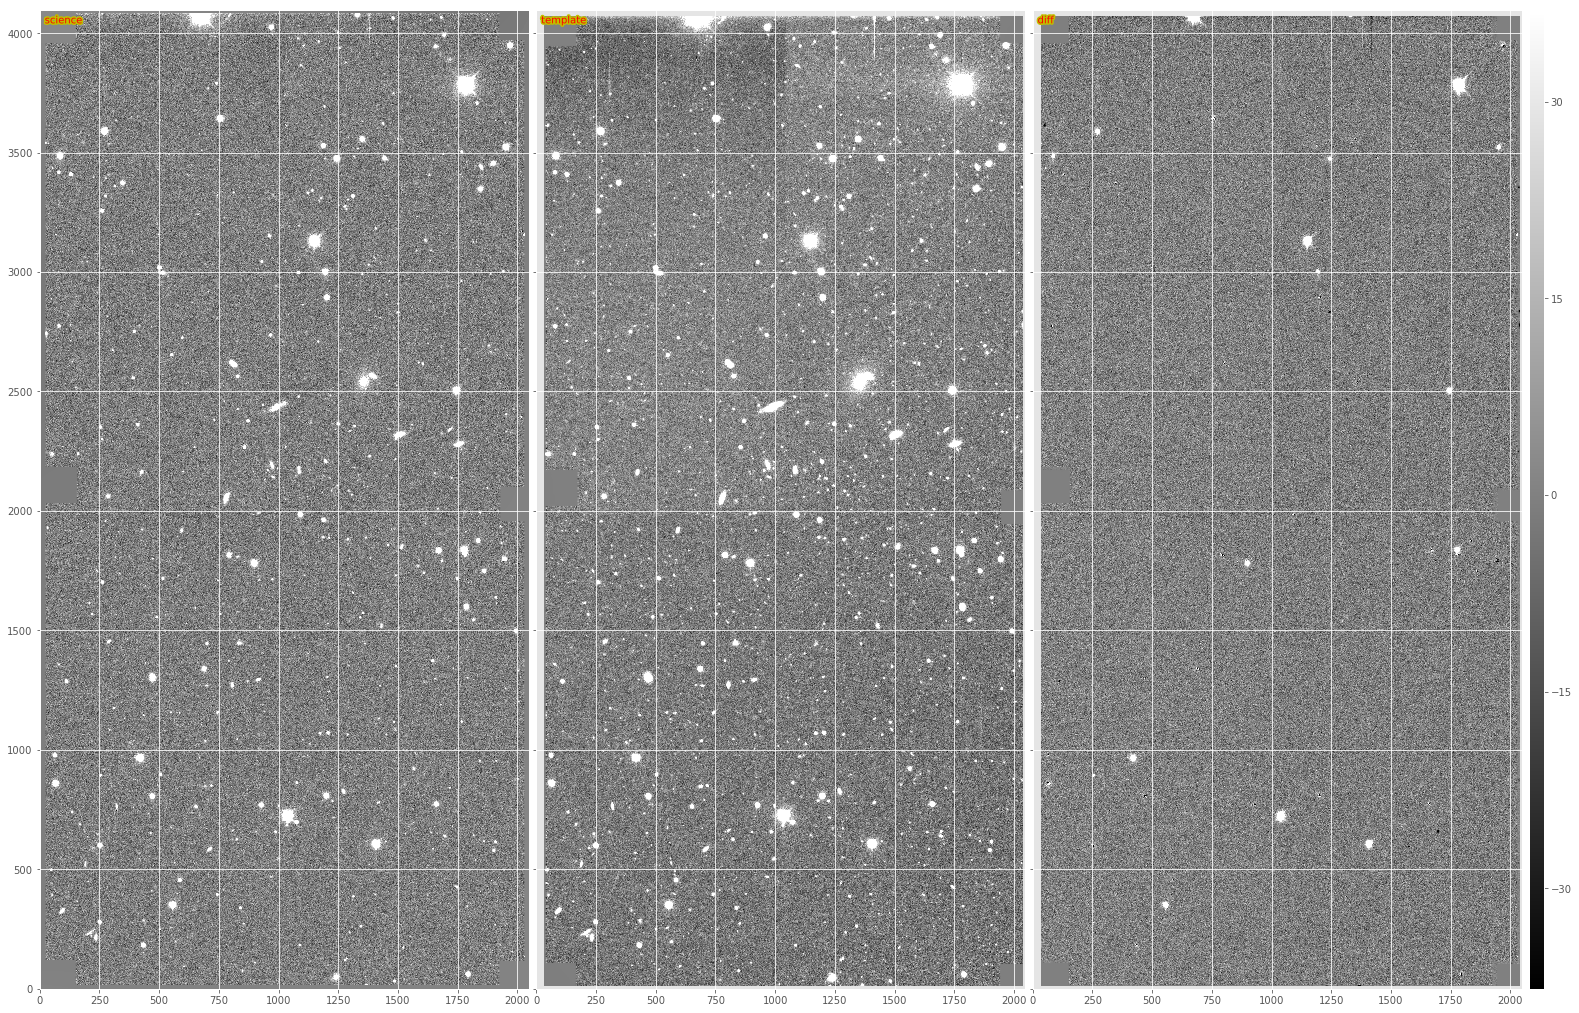

In [4]:
dit.plotImageGrid((science, matched_template, al_img,), imScale=18,
                 titles=['science', 'template', 'diff'])

In [9]:
import lsst.daf.persistence as dp
import pandas as pd

def load_dias(repo, as_df=True):
    butler = dp.Butler(repo)
    srces = butler.get('deepDiff_diaSrc',visit=289820,ccdnum=11)
    if as_df:
        srces = pd.DataFrame({col: srces.columns[col] for col in srces.schema.getNames()})
    return srces

al_dias_NEW = load_dias('decamDirTestNEW')
al_dias_OLD = load_dias('decamDirTestOLD')

Exception AttributeError: "'super' object has no attribute '__del__'" in <bound method SqliteRegistry.__del__ of <lsst.daf.persistence.registries.SqliteRegistry object at 0x874342c90>> ignored
Exception AttributeError: "'super' object has no attribute '__del__'" in <bound method SqliteRegistry.__del__ of <lsst.daf.persistence.registries.SqliteRegistry object at 0x877443250>> ignored


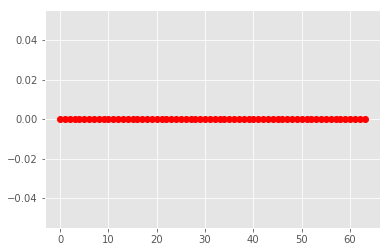

In [20]:
plt.plot(al_dias_NEW.base_GaussianCentroid_x - al_dias_NEW.base_GaussianCentroid_x, 'ro')

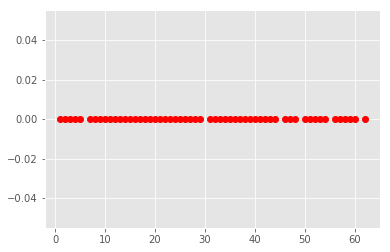

In [21]:
plt.plot(al_dias_NEW.base_PsfFlux_flux - al_dias_NEW.base_PsfFlux_flux, 'ro')